In [1552]:
# Import data science essentials
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import copy
from numpy import matlib

# Import plotting essentials
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline


In [1505]:
btc_file = 'coin_Bitcoin.csv'
eth_file = 'coin_Ethereum.csv'

In [1506]:
# Reading BTC and ETH price data
btc_df = pd.read_csv(btc_file,index_col='Date',parse_dates=True)
eth_df = pd.read_csv(eth_file,index_col='Date',parse_dates=True)

In [1507]:
# Using datetime to manipulate start and end dates for data
last_date = btc_df.index.max()
year = last_date - timedelta(days=359)

end_date = f"{last_date.year}-{last_date.month}-{last_date.day}"
start_date = f"{year.year}-{year.month}-{year.day}"

In [1508]:
# Slicing df using start and end dates
a = btc_df[start_date:end_date]
b = eth_df[start_date:end_date]

In [1509]:
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure(dpi=200)

# # Set up x-axis moving window
# moving_window = 100
# x_last = a.index.min()+timedelta(days=moving_window)
# x_first = a.index.min()

# # Update plot with starting background axis and labels
# ax = plt.axes(xlim=(x_first,x_last),ylim=(0,70000))
# line, = ax.plot([], [], lw=1,label='BTC PRICE')
# line.axes.tick_params(axis='x', labelrotation = 45)
# plt.legend()

In [1510]:
# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

In [1511]:
# moving_window = 100
# x_last = a.index.min()+timedelta(days=moving_window)
# x_first = a.index.min()
# dt = timedelta(days=1)

# def animate(i):
#     global x_last
#     global x_first
#     global dt
    
#     x = a.index[:i]
#     y = a['Close'][:i]
#     line.set_data(x, y)
    
#     if a.index[i] >= x_last-dt:
#         x_last += dt 
#         x_first += dt
#         line.axes.set_xlim(x_first,x_last)
        
#     return line,

In [1512]:
# anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(a.index), interval=100, blit=False)

In [1513]:
# # equivalent to rcParams['animation.html'] = 'html5'
# rc('animation', html='html5')

In [1514]:
# anim

In [1515]:
# In a previous version of the model I was using a log spread of the price. I decided to make the model simpler
# and just use a price spread. Forgive the name of the df.
log_close_btc = a['Close']

In [1516]:
#log_close_btc = np.log(log_close_btc)

In [1517]:
log_close_btc

Date
2020-07-12 23:59:59     9276.499850
2020-07-13 23:59:59     9243.613855
2020-07-14 23:59:59     9243.213416
2020-07-15 23:59:59     9192.837368
2020-07-16 23:59:59     9132.227863
                           ...     
2021-07-02 23:59:59    33897.048590
2021-07-03 23:59:59    34668.548402
2021-07-04 23:59:59    35287.779766
2021-07-05 23:59:59    33746.002456
2021-07-06 23:59:59    34235.193451
Name: Close, Length: 360, dtype: float64

In [1518]:
log_close_eth = b['Close']
#log_close_eth = np.log(log_close_eth)
log_close_eth

Date
2020-07-12 23:59:59     242.131695
2020-07-13 23:59:59     239.604585
2020-07-14 23:59:59     240.211494
2020-07-15 23:59:59     238.423527
2020-07-16 23:59:59     233.640883
                          ...     
2021-07-02 23:59:59    2150.040364
2021-07-03 23:59:59    2226.114282
2021-07-04 23:59:59    2321.724112
2021-07-05 23:59:59    2198.582464
2021-07-06 23:59:59    2324.679449
Name: Close, Length: 360, dtype: float64

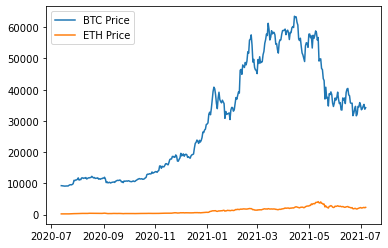

In [1519]:
# Plotting BTC and ETH price series
plt.plot(log_close_btc.index,log_close_btc, label="BTC Price")
plt.plot(log_close_eth.index,log_close_eth, label="ETH Price")
plt.legend()
plt.show()

In [1520]:
# Renaming dfs for Linear Mean Reversion strat
spread_btc = log_close_btc
spread_eth = log_close_eth

# This was used for a log return spread strategy. It was too difficult to implement so I decided to
# use a price spread instead with Linear Mean Reversion

# for i in range(1,len(log_close_btc)): 
#     spread_btc.append(log_close_btc[i]-log_close_btc[i-1])
#     spread_eth.append(log_close_eth[i]-log_close_eth[i-1])

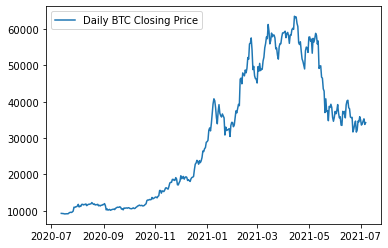

In [1521]:
# Plotting df (just checking data)
plt.plot(log_close_btc.index[:],spread_btc, label='Daily BTC Closing Price')
plt.legend()
plt.show()

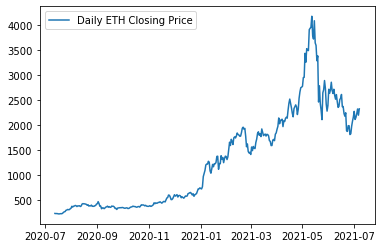

In [1522]:
# Plotting df (just checking data)
plt.plot(log_close_eth.index[:],spread_eth, label='Daily ETH Closing Price')
plt.legend()

In [1523]:
# Found this code on the internet to check for stationarity of time series. Wish I had the time to
# nerd out and understand it, but alas I do not have such luxuries.
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

def cointegration_test(Y, X):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(Y, X).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)

In [1524]:
# Initially the price series fails the stationary hypthesis test. Thats okay most pair trades fail this anyway
# its just a nice to have.
cointegration_test(spread_btc,spread_eth)

(-1.4232607015479724,
 0.5710752511894234,
 14,
 345,
 {'1%': -3.4494474563375737,
  '5%': -2.8699542285903887,
  '10%': -2.5712527305187987},
 6028.6262229551085)

In [1525]:
ols_result=sm.OLS(spread_btc, spread_eth).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3018.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                   8.16e-177
Time:                        22:27:02   Log-Likelihood:                         -3875.4
No. Observations:                 360   AIC:                                      7753.
Df Residuals:                     359   BIC:                                      7757.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         20.6809      0.376     54.938      0.000      19.941      21.421
==============================================================================
Omnibus:                       54.634   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.640
Skew:                          -1.018   Prob(JB):                     2.28e-17
Kurtosis:                       3.982   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

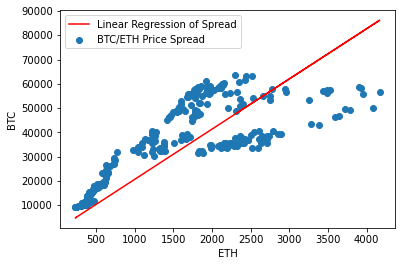

Close    20.680907
dtype: float64


In [1526]:
# This analysis is not used in the model it was just some prelimenary analysis. I think i mispelled that.
plt.scatter(spread_eth,spread_btc,label='BTC/ETH Price Spread')
plt.plot(spread_eth, ols_result.predict(),label='Linear Regression of Spread',c="red")
plt.legend()
plt.xlabel('ETH')
plt.ylabel('BTC')
plt.show()

print(ols_result.params)

In [1527]:
# Were finally ready to start implementing the pair trade model! 

# First set an arbitrary lookback window and introduce bias into the model. Ideally we should use a quantitative
# method to approximate this, but again no time. Ornstein–Uhlenbeck formula is a good choice to estimate half-life
# of mean reversion, however again, no time.

# Possibly could use a Data Science approach like a grid search or something and filter results for highest returns
# but thats a fantastic way to introduce over-fitting. I personally find quantitative approaches more comforting.
lookback=20

# Pre-allocate hedgeRatio array
hedgeRatio=np.empty(len(spread_btc))
hedgeRatio[:]=np.nan

# Use for loop, lookback window, and OLS to estimate hedgeRatio (BTC-hedgeRatio*ETH)
for t in range(lookback,len(hedgeRatio),1):
    
    regression_result=sm.OLS(spread_btc[t-lookback:t],spread_eth[t-lookback:t]).fit()
    hedgeRatio[t]=regression_result.params[0]

In [1528]:
# Testing how sm.OLS module works

# lookback=20
# t=lookback
# regression_result=sm.OLS(spread_btc[t-lookback:t],spread_eth[t-lookback:t]).fit()
# regression_result.params

In [1529]:
# y2 = [independent_spread dependent_spread]

# Create array to store prices for ETH and BTC
y2 = np.array([spread_eth, spread_btc]).transpose()

# introducing massive amounts of look-ahead bias :)
hedgeRatio_df = pd.DataFrame(hedgeRatio,columns=['Hedge Ratio'])
hedgeRatio_df.fillna(method='bfill',inplace=True)
hedgeRatio_df['Ones'] = np.ones(len(spread_btc))
hedgeRatio1 = copy.deepcopy(hedgeRatio_df)

hedgeRatio1

,Hedge Ratio,Ones
0,35.595291,1.0
1,35.595291,1.0
2,35.595291,1.0
3,35.595291,1.0
4,35.595291,1.0
...,...,...
355,16.254428,1.0
356,16.306193,1.0
357,16.315822,1.0
358,16.283180,1.0


In [1530]:
# For next step we need the negative of the hedgeRatio so...
hedgeRatio1['Hedge Ratio'] = hedgeRatio1['Hedge Ratio']*-1.0
hedgeRatio1

,Hedge Ratio,Ones
0,-35.595291,1.0
1,-35.595291,1.0
2,-35.595291,1.0
3,-35.595291,1.0
4,-35.595291,1.0
...,...,...
355,-16.254428,1.0
356,-16.306193,1.0
357,-16.315822,1.0
358,-16.283180,1.0


In [1531]:
# Calculating unit portfolio price using hedgeRatio and ETH-BTC prices
yport = np.sum(np.multiply(hedgeRatio1,y2),axis=1)
yport

0       657.751666
1       714.818901
2       692.815348
3       706.082513
4       815.712611
          ...     
355   -1050.627856
356   -1630.899630
357   -2593.056935
358   -2053.911828
359   -3643.514160
Length: 360, dtype: float64

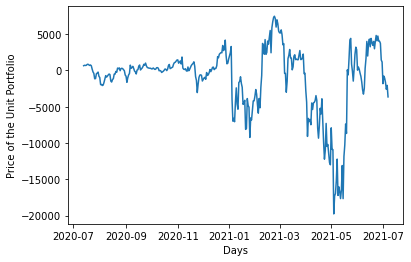

In [1555]:
# Plot the price of the unit portfolio. Notice that the mean is close to zero, but the variance increases over time.
# Probably good enough to trade but we will see...

# The fact that the Unit Portfolio mean stays near zero means that the OLS was successful in attempting to 
# create a stationary series. However, since the var increases over time the OLS is not aggressive enough.
# This is a job for a Kalman Filter but no time :(.

plt.plot(log_close_btc.index,yport)
plt.xlabel('Days')
plt.ylabel('Price of the Unit Portfolio')
plt.show()

In [1554]:
# Seems that the series is stationary despite the variance increasing over time.
l = log_close_btc.reset_index().index.to_numpy()
cointegration_test(yport,l)

(-3.6507426737641584,
 0.004861835934083462,
 13,
 346,
 {'1%': -3.4493918438232525,
  '5%': -2.8699298018856574,
  '10%': -2.5712397066390458},
 5994.480318319578)

In [1534]:
# Convert unit portfolio to df
yport_df = pd.DataFrame(yport)
yport_df

,0
0,657.751666
1,714.818901
2,692.815348
3,706.082513
4,815.712611
...,...
355,-1050.627856
356,-1630.899630
357,-2593.056935
358,-2053.911828


In [1535]:
# # Bollinger band strategy was a total failure! Using Linear Mean Reversion instead

# entryZscore=-1
# exitZscore=1

# # Calculates zScore for every day in the spread
# zScore=(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

# # Sets longsEntry array to zScore value if below entry threshold
# longsEntry=zScore < entryZscore

# # Sets longsExit array to zScore value if above exit threshold
# longsExit=zScore >= exitZscore

# # Set shortsEntry array to zScore value if above entry threshold
# shortsEntry=zScore > -entryZscore

# # Set shortsEntry array to zScore value if below exit threshold
# shortsExit=zScore <= -exitZscore

# # Setting Up simulated long trades
# numUnitsLong=np.empty(len(yport_df))
# numUnitsLong[:]=np.nan

# # Setting up simulated short trades
# numUnitsShort=np.empty(len(yport_df))
# numUnitsShort[:]=np.nan

# # Convert np long arrays to dfs
# numUnitsLong[0]=0
# numUnitsLong = pd.DataFrame(numUnitsLong)
# # Convert np short arrays to dfs
# numUnitsShort[0]=0
# numUnitsShort = pd.DataFrame(numUnitsShort)

# numUnitsLong[0].iloc[longsEntry.reset_index().loc[longsEntry.reset_index()['Spread']==True].index]=1
# numUnitsLong[0].iloc[longsExit.reset_index().loc[longsExit.reset_index()['Spread']==True].index]=0

# numUnitsLong.fillna(method='ffill',inplace=True)


# numUnitsShort[0].iloc[shortsEntry.reset_index().loc[shortsEntry.reset_index()['Spread']==True].index]=-1
# numUnitsShort[0].iloc[shortsExit.reset_index().loc[shortsExit.reset_index()['Spread']==True].index]=0

# numUnitsShort.fillna(method='ffill',inplace=True)

# numUnits= numUnitsLong + numUnitsShort
# numUnits.fillna(0)
# numUnits



In [1536]:
# For Linear Mean Reversion strategy we scale into the position as the unit portfolio
# deviates further from its mean. Anticipating mean reversion we unload the position and capture a profit....
# at least theoretically.
zScore=-(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

# This backfill introduces look-ahead bias but I had to deal with the nan somehow. In a production model this
# is certainly a no no.
zScore.fillna(method='bfill',inplace=True)
zScore.head(20)

,0
0,1.472025
1,1.472025
2,1.472025
3,1.472025
4,1.472025
5,1.472025
6,1.472025
7,1.472025
8,1.472025
9,1.472025


In [1537]:
# Had to create a deep copy since y2 is overwritten when calculating positions. IDK why that happens though.
y3 = copy.deepcopy(y2)
y3

array([[  242.13169523,  9276.49985018],
       [  239.60458484,  9243.61385509],
       [  240.21149418,  9243.21341642],
       [  238.42352695,  9192.83736784],
       [  233.64088301,  9132.22786293],
       [  232.77308561,  9151.39223963],
       [  235.48380522,  9159.03990531],
       [  238.48752372,  9185.81691242],
       [  236.15316771,  9164.2313647 ],
       [  245.01672849,  9374.88752808],
       [  262.19065629,  9525.36344997],
       [  274.68904905,  9581.07201141],
       [  279.21540948,  9536.89268563],
       [  304.0567612 ,  9677.11349729],
       [  309.64360929,  9905.16724705],
       [  321.51408818, 10990.8733998 ],
       [  316.65725234, 10912.8230505 ],
       [  318.19088442, 11100.4681253 ],
       [  334.58662928, 11111.2142899 ],
       [  345.55464931, 11323.4664207 ],
       [  385.19971932, 11759.5927707 ],
       [  370.67171149, 11053.613901  ],
       [  386.29517344, 11246.3487749 ],
       [  389.87548514, 11205.8929179 ],
       [  401.59

In [1539]:
hedgeRatio2 = copy.deepcopy(hedgeRatio_df)

In [1540]:
# Preparing hedgeRatio df for calculating daily position sizes in next cell
hedgeRatio2['Ones'] = hedgeRatio2['Ones']*-1.0
hedgeRatio2

,Hedge Ratio,Ones
0,35.595291,-1.0
1,35.595291,-1.0
2,35.595291,-1.0
3,35.595291,-1.0
4,35.595291,-1.0
...,...,...
355,16.254428,-1.0
356,16.306193,-1.0
357,16.315822,-1.0
358,16.283180,-1.0


In [1541]:
# Positions array for Linear Mean Reversion Strategy
positions = np.multiply(matlib.repmat(zScore,1,2),hedgeRatio2,y2)

In [1542]:
# Positions for strategy. First column is ETH position size. Second is BTC.
# For example 5.2 units of ETH per -1.47 units of BTC. These daily positions should keep
# the unit portfolio stationary
# if a position is negative that means we are short selling. This may not be possible, depends on the exchange.
# Also, technically short selling carries infinite risk, for example in the case of short squeezes. 
# GameStop and wallstreetbets reddit should come to mind.


positions

array([[ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 5.23971573e+01, -1.47202497e+00],
       [ 8.06779800e+01, -2.26653519e+00],
       [ 6.67370370e+01, -1.90528691e+00],
       [ 6.13403827e+01, -1.77894203e+00],
       [ 5.

In [1543]:
# Calculating Daily Profit and Loss
# This is as simple as multiplying the position size times the calculated returns using y3

pnl_arr = [0]
    
for i in range(1,y3.shape[0]):
    
    # Calculate pnl for independent variable (ETH)
    independent_return = positions[i-1,0]*((y3[i,0]-y3[i-1,0])/y3[i-1,0])
    
    # Calcualate pnl for dependent variable (BTC)
    dependent_return = positions[i-1,1]*(y3[i,1]-y3[i-1,1])/y3[i-1,1]
    
    # Compute daily_pnl by summing pnl for independent and dependent variable
    daily_pnl = independent_return+dependent_return
        
    pnl_arr.append(daily_pnl)


In [1558]:
pnl_df = pd.DataFrame(pnl_arr,columns=['Daily PnL'])
positions_df = pd.DataFrame(positions,columns=['ETH Position','BTC Position'])

In [1557]:
# temp_df is calculating the gross market value of the portfolio in preparation for returns in next cell
temp_df = positions_df.shift(1).abs().sum(axis=1)
temp_df

0       0.000000
1      53.869182
2      53.869182
3      53.869182
4      53.869182
         ...    
355    36.830829
356    34.043550
357    33.045530
358    34.046171
359    26.584114
Length: 360, dtype: float64

In [1546]:
# Computing daily returns
ret_df = pnl_df['Daily PnL'].div(temp_df)
ret_df

0           NaN
1     -0.010055
2      0.002465
3     -0.007091
4     -0.019331
         ...   
355    0.015678
356    0.032013
357    0.039435
358   -0.047453
359    0.053197
Length: 360, dtype: float64

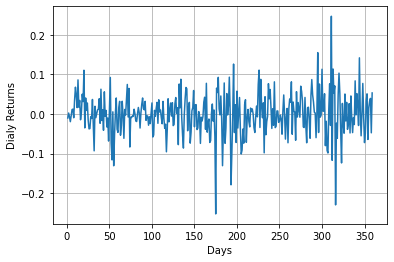

In [1548]:
# Plotting daily returns
plt.plot(ret_df)
plt.xlabel('Days')
plt.ylabel('Dialy Returns')
plt.grid()
plt.show()

# Looks like strat is pure choas lol

In [1549]:
# Computing cumulative returns. I'm so glad pandas has functions built in for this!
cumulative_ret = ret_df[1:].add(1).cumprod().sub(1)
cumulative_ret

1     -0.010055
2     -0.007615
3     -0.014652
4     -0.033700
5     -0.037246
         ...   
355   -0.503451
356   -0.487555
357   -0.467346
358   -0.492622
359   -0.465631
Length: 359, dtype: float64

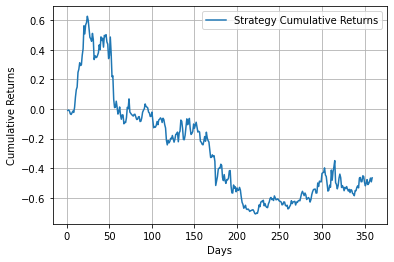

In [1556]:
# Plotting cumulative returns
plt.plot(cumulative_ret,label='Strategy Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Well all this work and we get garbage!
# Fun exercise though. This isn't surprising considering all the bias and steps we skipped.